### Кратий план работы:
**Анализ сервиса аренды самокатов GoFast:**
1. Открыть файл и посмотреть информацию, посмотреть наличие пропусков и дубликатов, зафиксировать начальные данные.
2. Произвести замену или удаление пропусков, а так же изменить дублирующиеся строки.
3. Произвести исследовательский анализ с помощью графиков и гистрограмм.
4. Объеденить данные о пользователях, визуализировать.
5. Подсчитать выручку по датафреймам.
6. Произвести проверку гипотез.
7. Подобрать параметры распределения.
8. Написать предварительные выводы, а так же общий вывод.

# Шаг №1 Загрузка данных

## Открываем файл и смотрим общую информацию¶

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom
import seaborn as sns

In [2]:
# open file
try:
    users_go = pd.read_csv('/datasets/users_go.csv')
    rides = pd.read_csv('/datasets/rides_go.csv')
    subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    users_go_url = 'https://drive.google.com/file/d/1ZAs833YDVIGOrFurDXsKu60s0aZoKBm8/view?usp=drive_link'
    rides_go_url = 'https://drive.google.com/file/d/1eTYBLyWOniaw-Cpuhlo5Ctj9-DMWbiaO/view?usp=drive_link'
    subscriptions_go_url = 'https://drive.google.com/file/d/1Ypbi51XUJlh88bT9CH1-9ZXhhcU8hZHC/view?usp=drive_link'
    
    path_users_go = 'https://drive.google.com/uc?export=download&id='+users_go_url.split('/')[-2]
    path_rides_go = 'https://drive.google.com/uc?export=download&id='+rides_go_url.split('/')[-2]
    path_subscriptions_go = 'https://drive.google.com/uc?export=download&id='+subscriptions_go_url.split('/')[-2]
    
    users_go = pd.read_csv(path_users_go)
    rides_go = pd.read_csv(path_rides_go, parse_dates=['date'])
    subscriptions_go = pd.read_csv(path_subscriptions_go)
    



In [3]:
# Функция для просмотра информации о DataFrame
def info_data_frame (x):
    return display(x.info(), 
        'Вывод первых 5 строчек:', x.head(), 
        f'Число строк : {x.shape[0]}', 
        f'Число столбцов : {x.shape[1]}', 
        f'Количество дубликатов = {x.duplicated().sum()}')

In [4]:
info_data_frame(users_go)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

'Вывод первых 5 строчек:'

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


'Число строк : 1565'

'Число столбцов : 5'

'Количество дубликатов = 31'

In [5]:
info_data_frame(rides_go)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


None

'Вывод первых 5 строчек:'

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


'Число строк : 18068'

'Число столбцов : 4'

'Количество дубликатов = 0'

In [6]:
info_data_frame(subscriptions_go)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

'Вывод первых 5 строчек:'

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


'Число строк : 2'

'Число столбцов : 4'

'Количество дубликатов = 0'

<div style="color: #000000; border-radius: 10px; box-shadow: 2px 2px 4px; border: 1px solid; background:#DCDCDC; padding: 10px;">
    
**Вывод по разделу:** 

Выведена информация по каждому датафрейму:
1. users_go имеет 1565 строк, 5 столбцов, в которых присутствуют явные дубликаты - 31, пропуски отсутсвуют
2. rides_go имеет 18068 строк, 5 столбцов, в которых нет явных дубликатов и пропусков.
3. subscriptions_go имеет 2 строки и 4 столбца, в которых нет явных дубликатов.</div>

# Шаг №2 Предобработка данных

## Приведение столбца `date` в DataFrame `rides_go` к типу pandas

In [7]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** Столбец `date` приведен к типу datetime
</div>

In [8]:
rides_go.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


## Приведение столбца `distance` и `duration` к целочисленным значениям

In [89]:
rides_go['distance'] = rides_go['distance'].round(2) # Приведение столбца distance к 2 знакам после запятой

In [10]:
rides_go['distance'].head()

0    4409.92
1    2617.59
2     754.16
3    2694.78
4    4028.69
Name: distance, dtype: float64

In [90]:
rides_go['duration'].head() # Проверка до округления

0    26
1    16
2     7
3    19
4    27
Name: duration, dtype: int32

In [12]:
rides_go['duration'] = np.ceil(rides_go['duration']) # Округление до потолка

In [13]:
rides_go['duration'] = rides_go['duration'].astype(int) # Приведение к целочисленному значению

In [14]:
rides_go['duration'].head()

0    26
1    16
2     7
3    19
4    27
Name: duration, dtype: int32

## Создание столбца с номером месяца

In [15]:
rides_go['date_month'] = rides_go['date'].dt.month

In [16]:
rides_go.head()

,user_id,distance,duration,date,date_month
0,1,4409.92,26,2021-01-01,1
1,1,2617.59,16,2021-01-18,1
2,1,754.16,7,2021-04-20,4
3,1,2694.78,19,2021-08-11,8
4,1,4028.69,27,2021-08-28,8


In [17]:
print(f"Данные собраны за период  {rides_go['date'].min()} по {rides_go['date'].max()}")

Данные собраны за период  2021-01-01 00:00:00 по 2021-12-30 00:00:00


## Обработка дубликатов и пропущенных значений

### Обработка DataFrame `users_go`

In [18]:
users_go[users_go.duplicated(keep=False)].tail() #Показать дубликаты

,user_id,name,age,city,subscription_type
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra
1564,1045,Артемий,28,Ростов-на-Дону,free


In [19]:
users_go.drop_duplicates(inplace=True)# Удаление дубликатов 

In [20]:
users_go.duplicated().sum()

0

In [21]:
subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


<div style="color: #000000; border-radius: 10px; box-shadow: 2px 2px 4px; border: 1px solid; background:#DCDCDC; padding: 10px;">

**Вывод по разделу:** 

Обработан  DataFrame **`rides_go`**:
    
1. Столбец `date` приведен к типу datetime.
2. Столбец `distance` округлён до 2х знаков после запятой.
3. Столбец `duration` приведен к целочисленному значению.
4. Добавлен новый столбец `date_month` с числом месяца.  
    
Обработан  DataFrame **`users_go`**:
1. Удалены дубликаты.

DataFrame **`subscriptions_go`** оставлен без изменения, пропусков и дубликатов не имеется.</div>

<div style="border:solid: green 2px; padding: 20px></div>

# Шаг №3 Исследовательский анализ данных

## Частота встречаемости городов

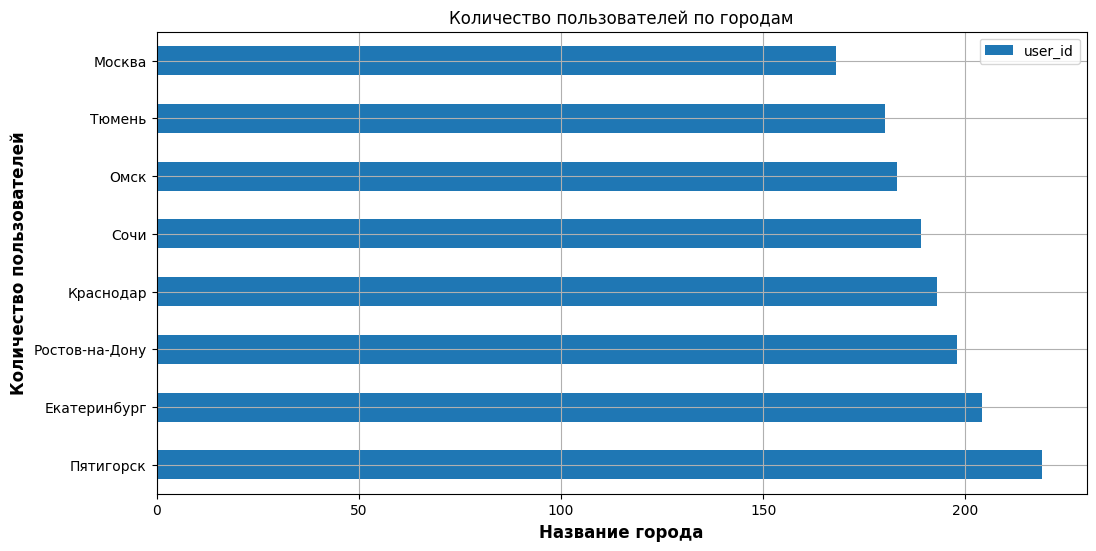

In [22]:
users_go.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False) \
    .plot(
    title='Количество пользователей по городам',
    kind='barh',
    grid=True,
    style='o-',
    figsize=(12, 6)       
)
plt.xlabel('Название города', fontsize=12, fontweight="bold")
plt.ylabel('Количество пользователей', fontsize=12, fontweight="bold")
plt.show()

In [23]:
users_go.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False).T

city,Пятигорск,Екатеринбург,Ростов-на-Дону,Краснодар,Сочи,Омск,Тюмень,Москва
user_id,219,204,198,193,189,183,180,168


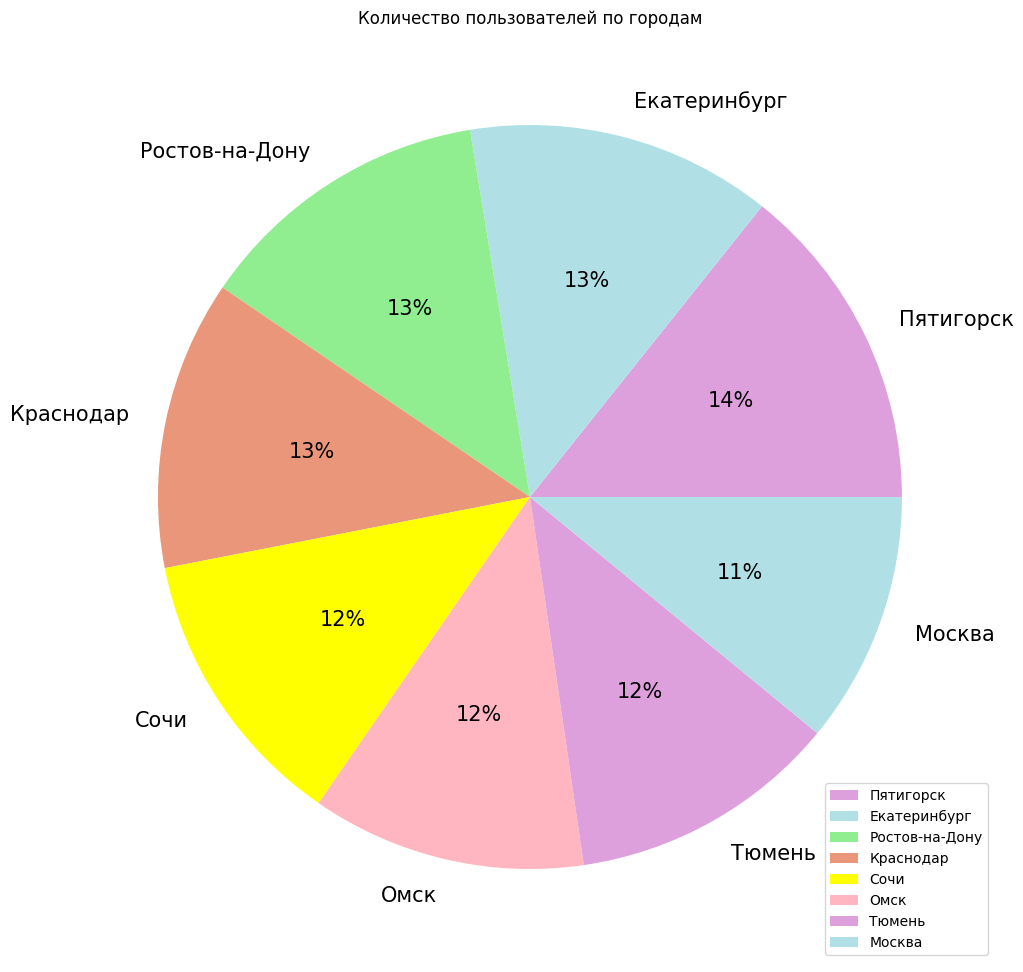

In [24]:
color_list = '#DDA0DD', '#B0E0E6', '#90EE90', '#E9967A', '#FFFF00','#FFB6C1'
users_go.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False) \
    .plot(
    title='Количество пользователей по городам', 
    x='city',
    y='user_id', 
    kind='pie',
    figsize=(12, 14),
    autopct='%1.0f%%',
    colors=color_list,
    fontsize=15
)
plt.ylabel(None)
plt.show()

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** На основе графика можно сделать вывод, что в первую пятёрку городов с самым длинным сезоном проката входят четыре южных города: Пятигорск, Ростов-на-Дону, Краснодар. Исключением является Екатеринбург, который находится на втором месте. Различие между городами не является существенным, так как процентное соотношение в целом отражает равномерное распределение пользователей по городам. Разница между Пятигорском и Москвой составляет 30 %. Вероятно, это связано с тем, что в Пятигорске много мест отдыха и развлечений, и многие предпочитают перемещаться на электросамокатах. Также в Пятигорске более продолжительный сезон проката.
</div>

## Соотношение пользователей с подпиской и без подписки

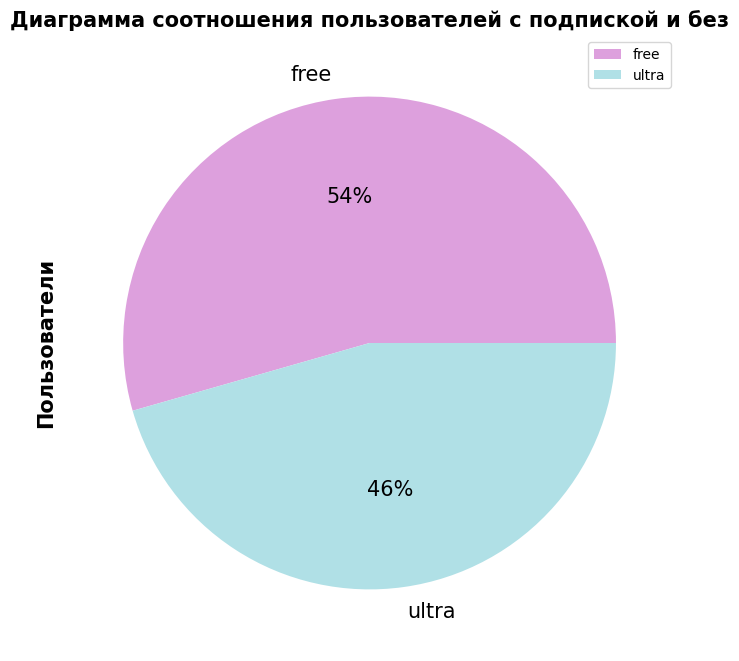

In [25]:
color_list = '#DDA0DD', '#B0E0E6'
users_go.pivot_table(index='subscription_type', values='user_id', aggfunc='count') \
    .plot(
    x='subscription_type',
    y='user_id', 
    kind='pie',
    figsize=(12, 8),
    autopct='%1.0f%%',
    colors=color_list,
    fontsize=15
)
plt.title('Диаграмма соотношения пользователей с подпиской и без', fontsize=15, fontweight="bold")
plt.ylabel('Пользователи', fontsize=15, fontweight="bold")
plt.show()

In [26]:
users_go.pivot_table(index='subscription_type', values='user_id', aggfunc='count').T

subscription_type,free,ultra
user_id,835,699


<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** На диаграмме и в сводной таблице видно, что количество пользователей без подписки превышает количество пользователей с платной подпиской.
</div>

## Соотношение по возрасту пользователей

In [27]:
users_go.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


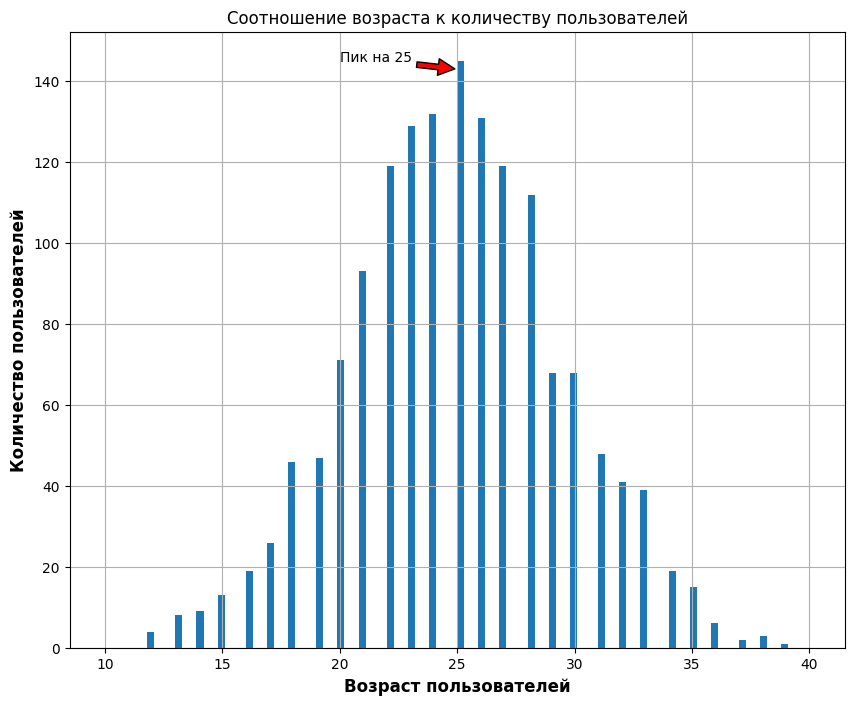

In [28]:
users_go.age \
    .plot(
    kind='hist',
    bins=100,
    title='Соотношение возраста к количеству пользователей',
    grid=True,
    range=(10, 40),
    figsize=(10, 8)       
)
plt.annotate("Пик на 25", xy=(25, 143), xytext=(20, 145),
            arrowprops=dict(facecolor='red', shrink=0.05))
plt.xlabel('Возраст пользователей', fontsize=12, fontweight="bold")
plt.ylabel('Количество пользователей', fontsize=12, fontweight="bold")
plt.show()

In [29]:
users_go.pivot_table(index='age', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False).head(10).T

age,25,24,26,23,27,22,28,21,20,30
user_id,145,132,131,129,119,119,112,93,71,68


In [30]:
users_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** График и таблица показывают, что основная масса пользователей находится в возрасте от 20 до 29 лет. Наибольшее количество пользователей — 25-летние, а наименьшее — 43-летние.
</div>

## Расстояние, которое пользователь преодолел за одну поездку

In [31]:
rides_go['distance'].describe().round(2)

count    18068.00
mean      3070.66
std       1116.83
min          0.86
25%       2543.23
50%       3133.61
75%       3776.22
max       7211.01
Name: distance, dtype: float64

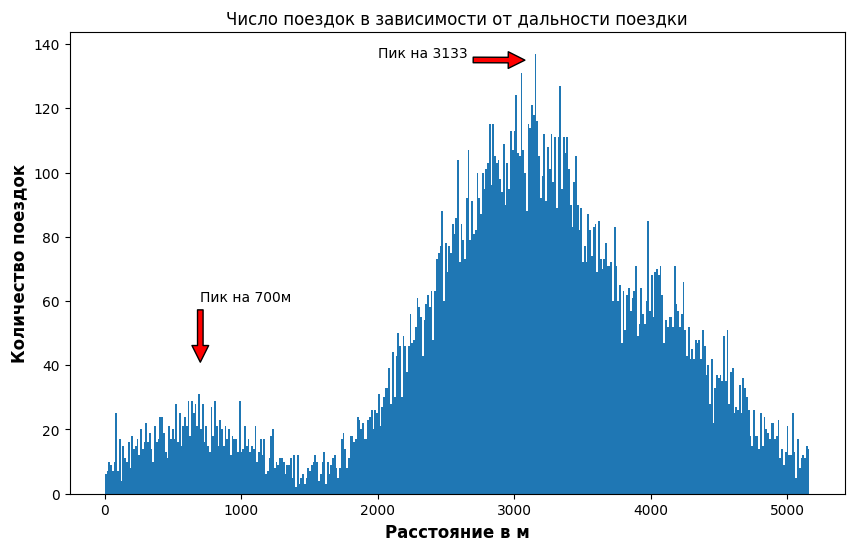

In [32]:
rides_go.distance \
    .plot(
    title='Число поездок в зависимости от дальности поездки',
    kind='hist', 
    bins=400, 
    range=(1, 5162),
    figsize=(10, 6)       
)
plt.annotate("Пик на 3133", xy=(3100, 135), xytext=(2000, 136),
            arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate("Пик на 700м", xy=(700, 40), xytext=(700, 60),
            arrowprops=dict(facecolor='red', shrink=0.05))
plt.xlabel('Расстояние в м', fontsize=12, fontweight="bold")
plt.ylabel('Количество поездок', fontsize=12, fontweight="bold")
plt.show()

(0.0, 8000.0)

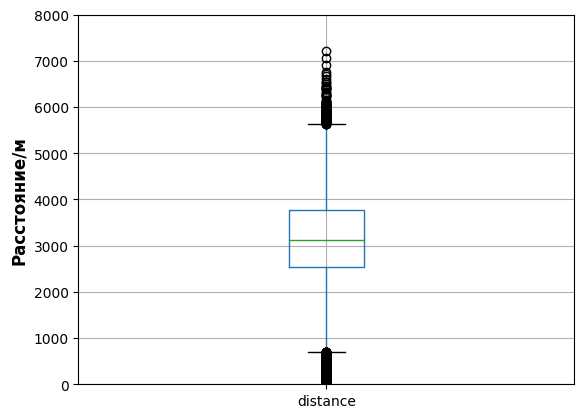

In [33]:
rides_go.boxplot('distance');
plt.ylabel('Расстояние/м', fontsize=12, fontweight="bold")
plt.ylim(0, 8000)

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** Судя по гистограмме, медианное значение и максимальный пик составляют 3133 метра. Также наблюдается пик в диапазоне 700–800 метров, после чего, ближе к отметке 1000 метров, происходит спад. Бесплатная подписка подразумевает оплату за каждую минуту использования, поэтому короткие поездки могут быть более распространены среди пользователей с такой подпиской. В результате дополнительный пик на расстоянии 700 метров связан с тем, что кратковременные поездки позволяют существенно сэкономить на услугах. Визуализация показывает, что первый и третий квартили находятся на отметках 2543 и 3776 метров соответственно. Затем следуют аномальные значения, превышающие 5900 метров.
</div>

## Соотношение по продолжительности поездки

In [34]:
rides_go.head()

,user_id,distance,duration,date,date_month
0,1,4409.92,26,2021-01-01,1
1,1,2617.59,16,2021-01-18,1
2,1,754.16,7,2021-04-20,4
3,1,2694.78,19,2021-08-11,8
4,1,4028.69,27,2021-08-28,8


In [35]:
rides_go['duration'].describe().round(2)

count    18068.00
mean        18.30
std          6.09
min          1.00
25%         14.00
50%         18.00
75%         22.00
max         41.00
Name: duration, dtype: float64

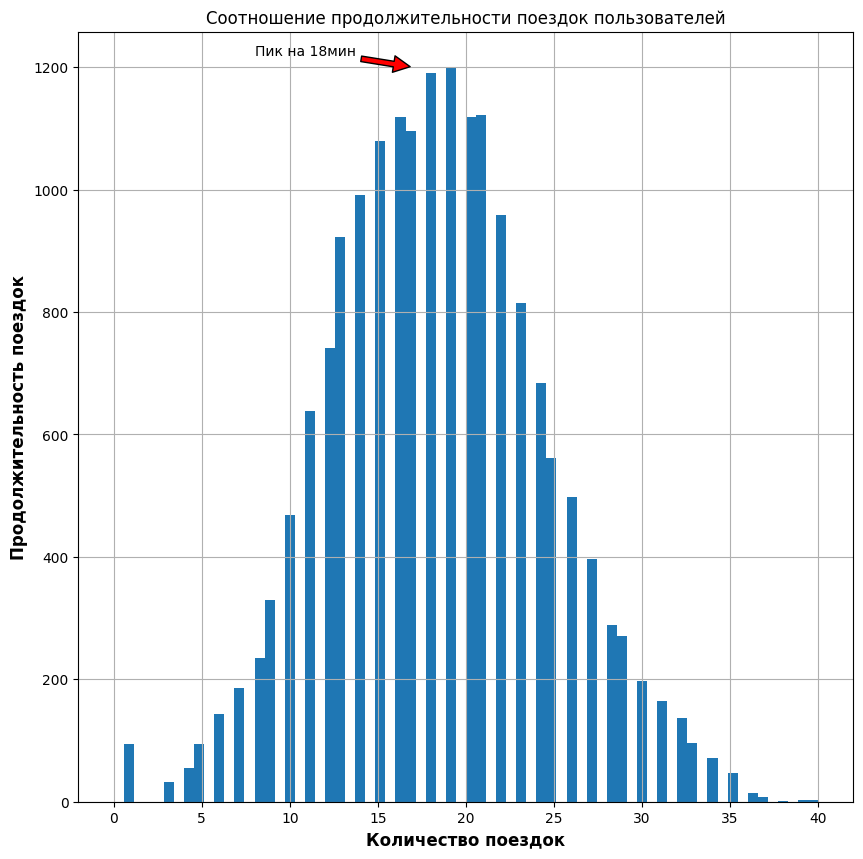

In [36]:
rides_go.duration \
    .plot(
    kind='hist', 
    bins=70, 
    range=(0, 40),
    title='Соотношение продолжительности поездок пользователей',
    grid=True,    
    figsize=(10, 10)       
)
plt.annotate("Пик на 18мин", xy=(17, 1200), xytext=(8, 1220),
            arrowprops=dict(facecolor='red', shrink=0.05))
plt.xlabel('Количество поездок', fontsize=12, fontweight="bold")
plt.ylabel('Продолжительность поездок', fontsize=12, fontweight="bold")
plt.show()

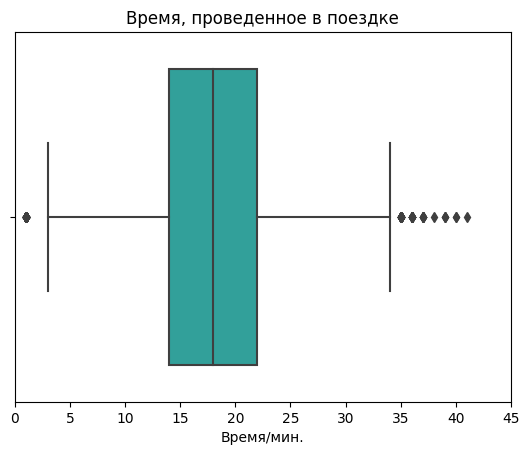

In [37]:
sns.boxplot(x = rides_go['duration'], color='#20B2AA')
plt.title('Время, проведенное в поездке')
plt.xlabel('Время/мин.')
_ = plt.xlim(0, 45)

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** Как видно из графика самые частые поездки составляют в среднем 18 минут, самые короткие составляют продолжительное время - 38 минут. График демонстрирует, что первый квартиль расположен на отметке 13 минут, третий квартиль — на 21 минуте, медиана — на 17 минутах. Также заметны аномальные значения после 34 минут.
</div>

<div style="color: #000000; border-radius: 10px; box-shadow: 2px 2px 4px; border: 1px solid; background:#DCDCDC; padding: 10px;">

**Вывод по разделу:** 
- В первой пятерке 4 южных города, исключение составляет Екатеринбург, использование электросамокатов чаще, потому что там тёплый климат и самокаты можно использовать практически круглый год. Это делает их удобным и популярным видом транспорта для передвижения по городу, так же была построена круговая диаграмма с процентными соотношениями городов из первой десятки.
- Пользователей с платной подпиской меньше - 46%, чем пользователей с бесплатной подпиской - 54%.
- Возрастной пик пользователей приходится на 25 лет, пользуются данная категория чаще из-за удобства, комфорта, экономии времени и денег, кроме того они дешевле в использовании, чем автомобили, их можно легко парковать.
- Пик продолжительности попадет на 3133, первый квартиль приходится на 2543, третий квартиль приходится на 3776, так же имеется пик в районе 700 метров, это связано с тем, что кратковременные поездки позволяют существенно сэкономить на услугах, имеются аномальные значения после 5900 метров. 
- Согласно графику, наиболее часто поездки длятся примерно 18 минут. Однако есть и более короткие поездки, которые могут продолжаться до 38 минут. Возможно, это связано с тем, что при длительном катании аккумулятор может разрядиться раньше окончания поездки. Первый и третий квартили находятся на отметках 13 и 21 минута соответственно. После 34 минут наблюдаются аномальные значения.</div>

# Шаг 4. Объединение данных

## Создание единый датафрейм о пользователях, поездках, и подписках.

In [38]:
rides_go.head()

,user_id,distance,duration,date,date_month
0,1,4409.92,26,2021-01-01,1
1,1,2617.59,16,2021-01-18,1
2,1,754.16,7,2021-04-20,4
3,1,2694.78,19,2021-08-11,8
4,1,4028.69,27,2021-08-28,8


In [39]:
users_go.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [40]:
subscriptions_go.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [41]:
# Создание общей таблицы с помощью merge
general_table = users_go \
    .merge(rides_go, on='user_id') \
    .merge(subscriptions_go, on='subscription_type'). \
    drop_duplicates().reset_index(drop=True)

In [42]:
general_table.head() # Просмотр первых 5 строк

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27,2021-08-28,8,6,0,199


In [43]:
general_table.duplicated().sum()

0

In [44]:
general_table.info() # Просмотр информации о пропусках и типах столбцах общей таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  int32         
 7   date               18068 non-null  datetime64[ns]
 8   date_month         18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(6), object(3)
memory usage: 1.6+ MB


In [45]:
print('Количество строк:', general_table.shape[0])

Количество строк: 18068


<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** Были объедены 3 таблицы, проверено количество строк, оно совпадает с максимальным в rides_go, пропуски отсутствуют, дубликаты удалены.
</div>

## Создание DataFrame с данными пользователей без подпиской и с подпиской

In [46]:
general_table['subscription_type'].unique() # Просмотр уникальных значений

array(['ultra', 'free'], dtype=object)

In [47]:
general_table_free = general_table.loc[general_table['subscription_type'] == 'free'] # Пользователи  без подписки

In [48]:
general_table_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,15,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,17,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,21,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,10,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,18,2021-02-14,2,8,50,0


In [49]:
general_table_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  int32         
 7   date               11568 non-null  datetime64[ns]
 8   date_month         11568 non-null  int64         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(6), object(3)
memory usage: 1.1+ MB


In [50]:
general_table_ultra = general_table.loc[general_table['subscription_type'] == 'ultra'] # Пользователи с подпиской

In [51]:
general_table_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27,2021-08-28,8,6,0,199


In [52]:
general_table_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   int32         
 7   date               6500 non-null   datetime64[ns]
 8   date_month         6500 non-null   int64         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(6), object(3)
memory usage: 634.8+ KB


In [53]:
print('Общее количество строк:', general_table_free.shape[0] + general_table_ultra.shape[0])

Общее количество строк: 18068


<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** Количество строк с подпиской и без совпадает с общим количеством `general_table`.
</div>

## Визуализация о расстоянии и времени поездок для обеих категорий

In [54]:
general_table_free['distance'].describe().round(2)

count    11568.00
mean      3045.50
std       1246.17
min          0.86
25%       2366.56
50%       3114.65
75%       3905.70
max       7211.01
Name: distance, dtype: float64

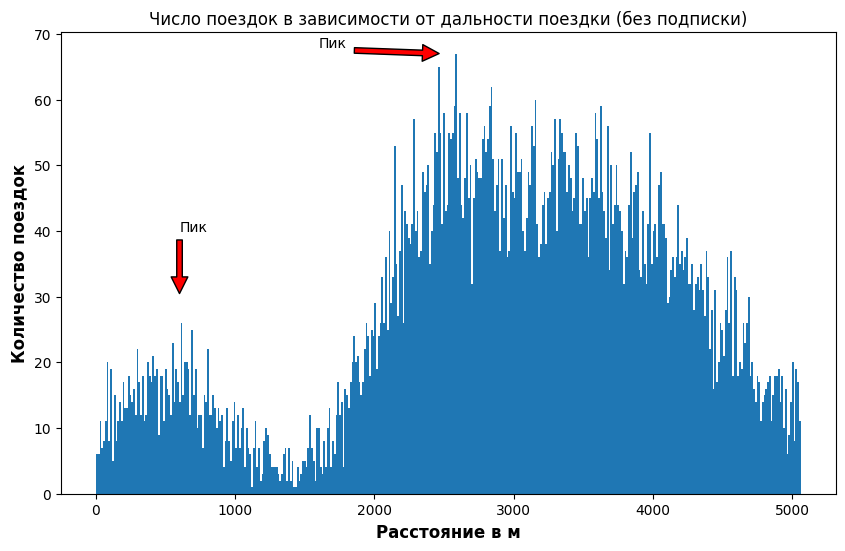

In [55]:
general_table_free.distance \
    .plot(
    title='Число поездок в зависимости от дальности поездки (без подписки)',
    kind='hist', 
    bins=400, 
    range=(1, 5062),
    figsize=(10, 6)       
)
plt.annotate("Пик", xy=(2500, 67), xytext=(1600, 68),
            arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate("Пик", xy=(600, 30), xytext=(600, 40),
            arrowprops=dict(facecolor='red', shrink=0.05))
plt.xlabel('Расстояние в м', fontsize=12, fontweight="bold")
plt.ylabel('Количество поездок', fontsize=12, fontweight="bold")
plt.show()

In [56]:
general_table_free['duration'].describe().round(2)

count    11568.00
mean        17.89
std          6.33
min          1.00
25%         13.00
50%         18.00
75%         22.00
max         35.00
Name: duration, dtype: float64

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** Медиана пользователей без подписки находится на 3114.
</div>

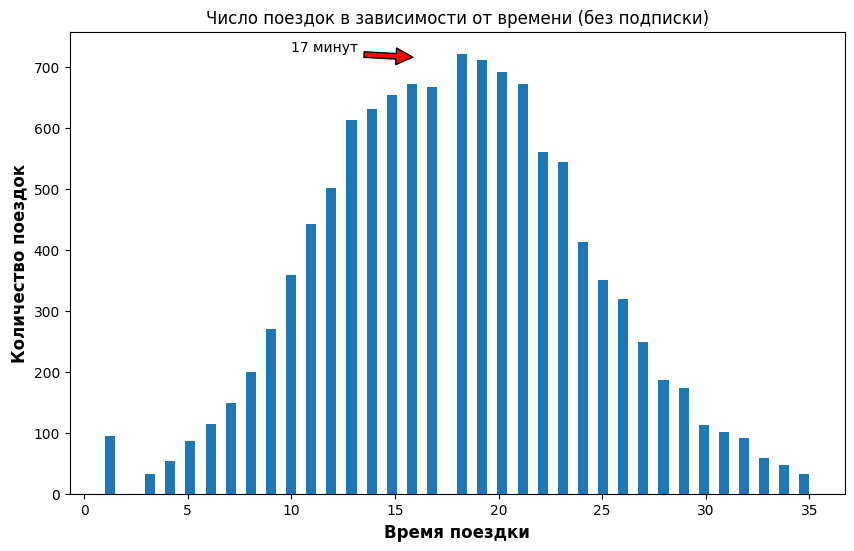

In [57]:
general_table_free.duration \
    .plot(
    title='Число поездок в зависимости от времени (без подписки)',
    kind='hist', 
    bins=70, 
    range=(1, 35),
    figsize=(10, 6)       
)
plt.annotate("17 минут", xy=(16, 715), xytext=(10, 725),
            arrowprops=dict(facecolor='red', shrink=0.05))
plt.xlabel('Время поездки', fontsize=12, fontweight="bold")
plt.ylabel('Количество поездок', fontsize=12, fontweight="bold")
plt.show()

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** Пик поездок по времени у пользователей без подписки составляет 17 минут.
</div>

In [58]:
general_table_ultra['distance'].describe().round(2)

count    6500.00
mean     3115.45
std       836.90
min       244.21
25%      2785.45
50%      3148.64
75%      3560.58
max      5699.77
Name: distance, dtype: float64

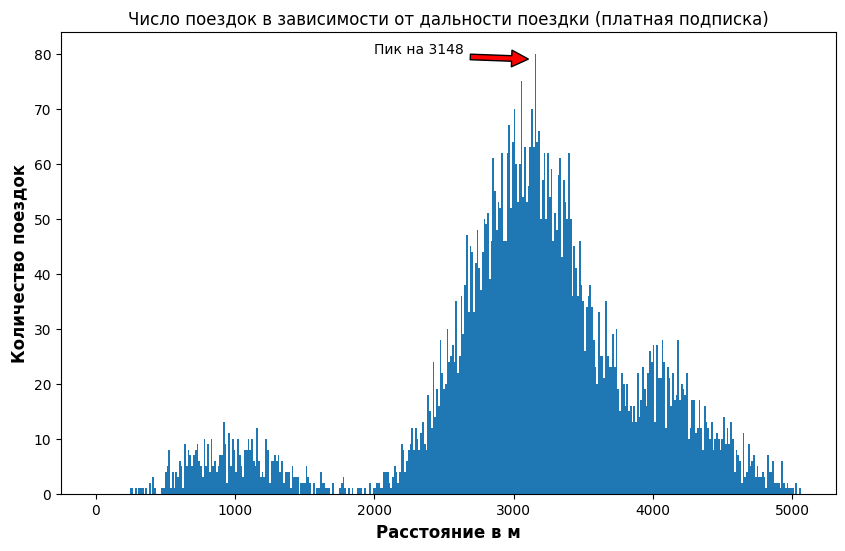

In [59]:
general_table_ultra.distance \
    .plot(
    title='Число поездок в зависимости от дальности поездки (платная подписка)',
    kind='hist', 
    bins=400, 
    range=(1, 5062),
    figsize=(10, 6)       
)
plt.annotate("Пик на 3148", xy=(3130, 79), xytext=(2000, 80),
            arrowprops=dict(facecolor='red', shrink=0.05))
plt.xlabel('Расстояние в м', fontsize=12, fontweight="bold")
plt.ylabel('Количество поездок', fontsize=12, fontweight="bold")
plt.show()

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** Медиана пользователей без подписки находится на 3148.
</div>

In [60]:
general_table_ultra['duration'].describe().round(2)

count    6500.00
mean       19.04
std         5.58
min         4.00
25%        15.00
50%        19.00
75%        22.00
max        41.00
Name: duration, dtype: float64

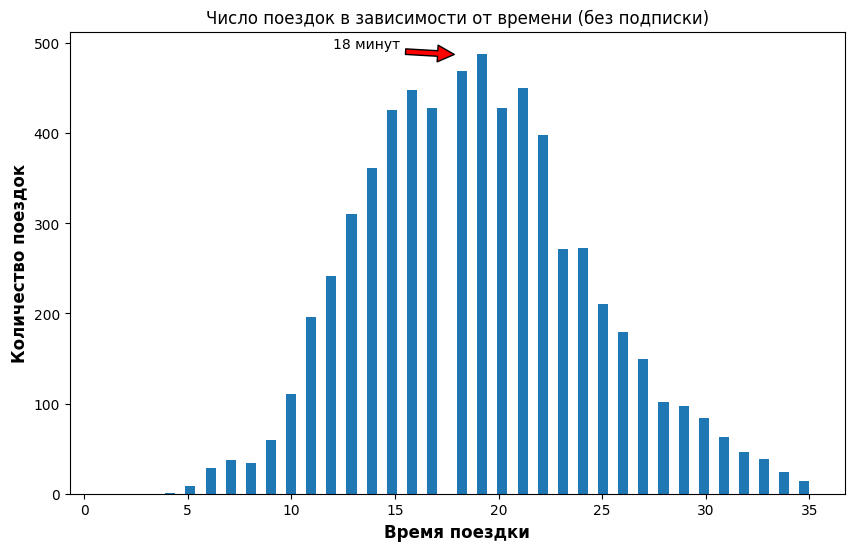

In [61]:
general_table_ultra.duration \
    .plot(
    title='Число поездок в зависимости от времени (без подписки)',
    kind='hist', 
    bins=70, 
    range=(1, 35),
    figsize=(10, 6)       
)
plt.annotate("18 минут", xy=(18, 487), xytext=(12, 494),
            arrowprops=dict(facecolor='red', shrink=0.05))
plt.xlabel('Время поездки', fontsize=12, fontweight="bold")
plt.ylabel('Количество поездок', fontsize=12, fontweight="bold")
plt.show()

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** Пик поездок по времени у пользователей без подписки составляет 18 минут.
</div>

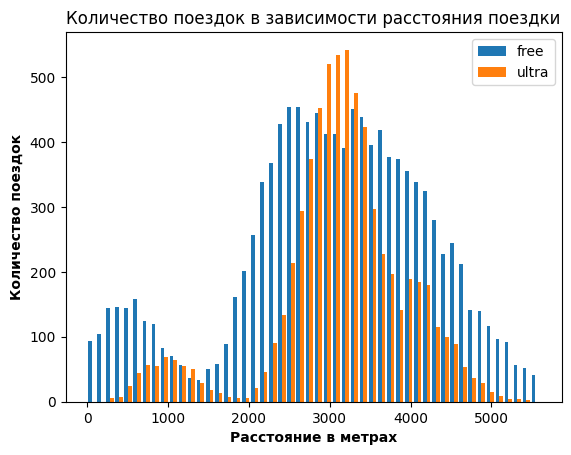

In [62]:
plt.hist([general_table_free['distance'], general_table_ultra['distance']], \
         bins=50, range=(1,5600), label=['free', 'ultra'])
plt.legend(loc='upper right')
plt.title('Количество поездок в зависимости расстояния поездки')
plt.xlabel('Расстояние в метрах', fontsize=10, fontweight="bold")
plt.ylabel('Количество поездок', fontsize=10, fontweight="bold")
plt.show()

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** Как видно по гистрограмма наиболее преодалённое расстояние у пользователей с подпиской.
</div>

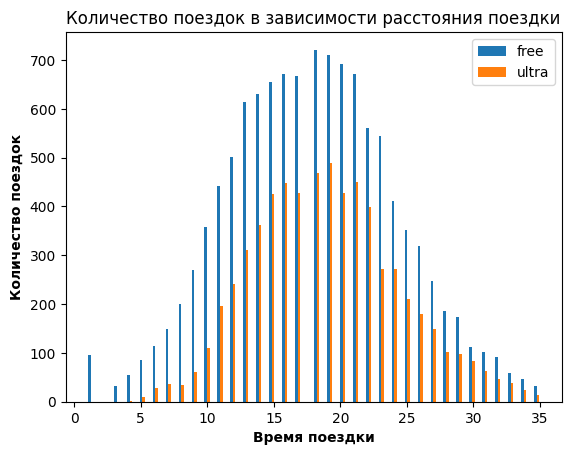

In [63]:
plt.hist([general_table_free['duration'], general_table_ultra['duration']], \
         bins=70, range=(1,35), label=['free', 'ultra'])
plt.legend(loc='upper right')
plt.title('Количество поездок в зависимости расстояния поездки')
plt.xlabel('Время поездки', fontsize=10, fontweight="bold")
plt.ylabel('Количество поездок', fontsize=10, fontweight="bold")
plt.show()

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** Время поездки больше у пользователей без подписки.
</div>

<div style="color: #000000; border-radius: 10px; box-shadow: 2px 2px 4px; border: 1px solid; background:#DCDCDC; padding: 10px;">

**Вывод по разделу:** 
- Объединены 3 датафрейма в один, проверено количество строк - **18068**, удалены дубликаты и проверены пропуски в столбцах.
- Создано 2 датафрема с информацией о пользователях без подписки и с подпиской, проверена сумма строк - **18068**.
- Визуализированы данные о расстоянии и времени поездок, так в среднем пользователи проезжают расстояние 3114 метров, а время поездок составляет 17 минут, это связано с тем, что активация самоката и списание средств происходят в начале поездки, поэтому пользователи без подписки вынуждены быть более внимательными к стоимости аренды и ограничивать время использования самоката. Пользователи с подпиской проезжают в среднем 3148 метров, время поездок 18 минут, так же построена гистрограмма, которая позволяет увидить общую информацию.    
</div>

# Шаг 5. Подсчёт выручки

## Создание датафрейма с агрегированными данными о поездках

In [64]:
general_table.head()

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27,2021-08-28,8,6,0,199


In [65]:
user_gener_table = general_table.pivot_table(
    index=('user_id', 'name', 'age', 'city', 'date_month'), 
    values=(
        'distance', 
        'duration', 
        'minute_price', 
        'start_ride_price', 
        'subscription_fee',
        'subscription_type'
    ), 
    aggfunc=({'distance':{'count', 'sum'}, 
             'duration':'sum',
             'minute_price': 'mean',
             'start_ride_price':'mean',
             'subscription_fee':'mean',
             'subscription_type': 'min'})
)

In [69]:
user_gener_table.isna().sum()

distance           count    0
                   sum      0
duration           sum      0
minute_price       mean     0
start_ride_price   mean     0
subscription_fee   mean     0
subscription_type  min      0
dtype: int64

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** Агрегированные данные проверены на пропуски.
</div>

In [70]:
user_gener_table.head()

distance          duration minute_price  \
                                      count      sum      sum         mean   
user_id name age city   date_month                                           
1       Кира 22  Тюмень 1                 2  7027.51       42            6   
                        4                 1   754.16        7            6   
                        8                 2  6723.47       46            6   
                        10                2  5809.91       32            6   
                        11                3  7003.50       56            6   

                                   start_ride_price subscription_fee  \
                                               mean             mean   
user_id name age city   date_month                                     
1       Кира 22  Тюмень 1                         0              199   
                        4                         0              199   
                        8                         0              199   
                        10                        0              199   
                        11                        0              199   

                                   subscription_type  
                                                 min  
user_id name age city   date_month                    
1       Кира 22  Тюмень 1                      ultra  
                        4                      ultra  
                        8                      ultra  
                        10                     ultra  
                        11                     ultra

In [71]:
# Название столбцов
user_gener_table.columns = ['count', 
                            'distance', 
                            'duration', 
                            'minute_price', 
                            'start_ride_price', 
                            'subscription_fee', 
                            'subscription_type'] 

In [72]:
user_gener_table.head(5)

count  distance  duration  minute_price  \
user_id name age city   date_month                                            
1       Кира 22  Тюмень 1               2   7027.51        42             6   
                        4               1    754.16         7             6   
                        8               2   6723.47        46             6   
                        10              2   5809.91        32             6   
                        11              3   7003.50        56             6   

                                    start_ride_price  subscription_fee  \
user_id name age city   date_month                                       
1       Кира 22  Тюмень 1                          0               199   
                        4                          0               199   
                        8                          0               199   
                        10                         0               199   
                        11                         0               199   

                                   subscription_type  
user_id name age city   date_month                    
1       Кира 22  Тюмень 1                      ultra  
                        4                      ultra  
                        8                      ultra  
                        10                     ultra  
                        11                     ultra

In [73]:
user_gener_table.tail()

count  distance  duration  \
user_id name    age city      date_month                              
1534    Альберт 25  Краснодар 6               2   3409.47        26   
                              8               2   7622.45        48   
                              9               1   4928.17        23   
                              11              4  13350.02        78   
                              12              1   2371.71        16   

                                          minute_price  start_ride_price  \
user_id name    age city      date_month                                   
1534    Альберт 25  Краснодар 6                      8                50   
                              8                      8                50   
                              9                      8                50   
                              11                     8                50   
                              12                     8                50   

                                          subscription_fee subscription_type  
user_id name    age city      date_month                                      
1534    Альберт 25  Краснодар 6                          0              free  
                              8                          0              free  
                              9                          0              free  
                              11                         0              free  
                              12                         0              free

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** Создана сводная таблица по каждому пользователю за месяц.
</div>

In [74]:
def revenue(row):
    if row['subscription_type'] == 'ultra':
        return row['minute_price'] * row['duration'] + row['subscription_fee']
    elif row['subscription_type'] == 'free':
        return row['minute_price'] * row['duration'] + row['start_ride_price'] * row['count']
    else:
        'no_such_category'

In [75]:
user_gener_table['monthly_revenue'] = user_gener_table.apply(revenue, axis=1)

In [76]:
user_gener_table.head()

count  distance  duration  minute_price  \
user_id name age city   date_month                                            
1       Кира 22  Тюмень 1               2   7027.51        42             6   
                        4               1    754.16         7             6   
                        8               2   6723.47        46             6   
                        10              2   5809.91        32             6   
                        11              3   7003.50        56             6   

                                    start_ride_price  subscription_fee  \
user_id name age city   date_month                                       
1       Кира 22  Тюмень 1                          0               199   
                        4                          0               199   
                        8                          0               199   
                        10                         0               199   
                        11                         0               199   

                                   subscription_type  monthly_revenue  
user_id name age city   date_month                                     
1       Кира 22  Тюмень 1                      ultra              451  
                        4                      ultra              241  
                        8                      ultra              475  
                        10                     ultra              391  
                        11                     ultra              535

In [77]:
ultra_revenue = user_gener_table.loc[user_gener_table['subscription_type'] == 'ultra', 
                                     'monthly_revenue'].sum()

In [78]:
ultra_revenue_mean = user_gener_table.loc[user_gener_table['subscription_type'] == 'ultra', 
                                          'monthly_revenue'].mean().round(2)  

In [79]:
free_revenue_mean = user_gener_table.loc[user_gener_table['subscription_type'] == 'free', 
                                         'monthly_revenue'].mean().round(2)

In [80]:
free_revenue = user_gener_table.loc[user_gener_table['subscription_type'] == 'free', 
                                    'monthly_revenue'].sum()

In [81]:
display(f'Общая выручка от платных подписчиков за 12 месяцев = {ultra_revenue}₽.')

'Общая выручка от платных подписчиков за 12 месяцев = 1644537₽.'

In [82]:
display(f'Общая от пользователей без подписки за 12 месяцев = {free_revenue}₽.')

'Общая от пользователей без подписки за 12 месяцев = 2234104₽.'

In [83]:
display(f'В среднем за месяц от пользователя с подпиской = {ultra_revenue_mean}₽.')

'В среднем за месяц от пользователя с подпиской = 362.79₽.'

In [84]:
display(f'В среднем за месяц от пользователя без подписки = {free_revenue_mean}₽.')

'В среднем за месяц от пользователя без подписки = 328.64₽.'

In [85]:
display(f"Общая выручка сервиса GoFast {user_gener_table['monthly_revenue'].sum()}₽")

'Общая выручка сервиса GoFast 3878641₽'

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** За 12 месяцев сервис GoFast заработал сумму 3878641₽, от пользователей с подпиской 1644537₽ и без подписки 2234104₽, в среднем сервис зарабатывает 362.79₽ от пользователя с подпиской и 328.64₽ без подписки. 
</div>

<div style="color: #000000; border-radius: 10px; box-shadow: 2px 2px 4px; border: 1px solid; background:#DCDCDC; padding: 10px;">

**Вывод по разделу:** 
- Создана сводная таблица по каждому пользователю за каждый месяц на основе 4 шага с столбцами `count`, `distance`, `duration`, `minute_price`, `start_ride_price`, `subscription_fee`, `monthly_revenue` и строками `user_id`, `name`, `age`, `city`, `subscription_type`, `date_month	`.
- Добавлен новый столбец с подсчётом помесячной выручки `monthly_revenue`.
</div>

# Шаг 6. Проверка гипотез

## Тратят ли пользователи с подпиской больше времени на поездки?

In [ ]:
alpha = 0.05 # уровень статистической значимости

In [ ]:
results = st.ttest_ind(general_table_ultra['duration'], general_table_free['duration'], alternative='greater')

In [ ]:
print('p-значение:', results.pvalue)

In [ ]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** 
- За H0 - Средняя продолжительность поездок пользователей с подпиской ultra и без free одинакова.
- За H1 - Средняя продолжительность поездок пользователей с подпиской ultra превышает среднюю продолжительность поездок пользователей без подписки free.
- гипотеза была проверена с помощью метода `ttest_ind()` и в качестве `alternative` был указан параметр `greater`(больше).
- Полученное значение `p-value: 2.495945372073663e-34` крайне мало - вероятность получения одинаковых результатов, что пользователи с подпиской и без тратят одинаковое время, если нулевая гипотеза верна, крайне мала. Это указывает на высокую статистическую значимость полученных данных.
- Бизнесу выгодно, когда пользователи с подпиской тратят больше времени на поездки, потому что это увеличивает их лояльность к бренду и частоту использования его услуг. Подписчики получают комплексные скидки, эксклюзивные форматы подписок и доступ к нескольким сервисам одновременно, что делает их более привязанными к компании и готовыми тратить больше денег на её услуги.    
</div>

## Превышает ли расстояние одной поездки пользователей с подпиской 3130 метров?

In [ ]:
alpha = 0.05 # уровень статистической значимости

In [ ]:
distance = 3130 # Н0

In [ ]:
results = st.ttest_1samp(general_table_ultra['distance'], distance,  alternative='greater')

In [ ]:
print('p-значение:', results.pvalue)

In [ ]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** 
- За H0 - среднее расстояние равно 3130 метров.
- За H1 - среднее расстояние более 3130 метров.
- гипотеза была проверена с помощью метода `ttest_1samp` и в качестве `alternative` был указан параметр `greater`(правосторонней).
- Полученное значение `p-value: 0.9195362605842414` больше заданного уровня значимости, поэтому не получилось отвергнуть нулевую гипотезу. Расстояние 3130 выгодно бизнесу с точки зрения износа самокатов, потому что на таком расстоянии стоимость аренды самоката покрывает его износ. Это позволяет бизнесу получать прибыль и компенсировать затраты на обслуживание и ремонт самокатов.
</div>

## Выше ли помесячная выручка от пользователей с подпиской, чем выручка пользователей без подписки?

In [ ]:
alpha = 0.05 # уровень статистической значимости

In [ ]:
results = st.ttest_ind( \
    user_gener_table.loc[user_gener_table['subscription_fee'] > 0, 'monthly_revenue'], 
    user_gener_table.loc[user_gener_table['subscription_fee'] == 0, 'monthly_revenue'], alternative='greater') 

In [ ]:
print('p-значение:', results.pvalue)

In [ ]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** 
- За H0 -  выручка от пользователей с подпиской равна выручке пользователей без подписки.
- За H1 - выручка от пользователей с подпиской выше, чем от пользователей без подписки.
- гипотеза была проверена с помощью метода `ttest_ind` и в качестве `alternative` был указан параметр `greater`(больше).
- Полученное значение `p-value: 1.1914705742669238e-43` меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу.
- Скорее всего это связано с тем, что пользователи с подпиской готовы платить за дополнительные функции и контент, которые представляет подписка.
</div>

## Снизилось ли количество обращений в поддержку?

In [86]:
# Пример с искусственно созданными выборками
requests_before = [821, 1164, 598, 854, 455, 1220, 161, 1400, 479, 215, 
          564, 159, 920, 173, 276, 444, 273, 711, 291, 880, 
          892, 712, 16, 476, 498, 9, 1251, 938, 389, 513]

requests_after = [904, 220, 676, 459, 299, 659, 1698, 1120, 514, 1086, 1499, 
         1262, 829, 476, 1149, 996, 1247, 1117, 1324, 532, 1458, 898, 
         1837, 455, 1667, 898, 474, 558, 639, 1012]

print('Среднее до:', pd.Series(requests_before).mean().round(2))
print('Среднее после:', pd.Series(requests_after).mean().round(2))

alpha = 0.05 # уровень статистической значимости

results = st.ttest_rel(requests_after, requests_before, alternative='less')

# p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравнение p-значение с заданным уровнем стат. значимости
    print('Отвергаем нулевую гипотезу о равенстве среднего количества обращений')
else:
    print('Не получилось отвергнуть нулевую гипотезу о равенстве среднего количества обращений')

Среднее до: 591.73
Среднее после: 932.07
p-значение: 0.9946052480895945
Не получилось отвергнуть нулевую гипотезу о равенстве среднего количества обращений


<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** 

Гипотезы в таком случае будут сформулированы так:
- μ1 и μ2 - средние значения до и после изменения.
- За H0 - среднее колличество обращений не изменилось μ1=μ2.
- За H1 - среднее колличество обращений увеличилось μ1 < μ2.
        
- гипотеза была бы проверена с помощью метода `scipy.stats.ttest_rel()`, выборки в этом случае будут зависимыми, в качестве аргумента следует указать `alternative='less'`, проверится левосторонняя альтернативная гипотеза о том, что истинное среднее генеральной совокупности, из которой взяли первую выборку, меньше, чем истинное среднее генеральной совокупности, из которой взяли вторую.
</div>

<div style="color: #000000; border-radius: 10px; box-shadow: 2px 2px 4px; border: 1px solid; background:#DCDCDC; padding: 10px;">

**Вывод по разделу:** 
- Проверена гипатеза о том, что пользователи с подпиской тратят больше времени на поездки, нулевая гипотеза была отвергнута, так как `p-value: 2.495945372073663e-34` получился ниже уровня статистической значимости.
- Проверена гипотеза о том, что среднее расстояние одной поездки пользователей с подпиской равно 3130 метров и является оптимальным с точки зрения износа самоката, нулевую гипотезу не получилось отвергнуть, так как `p-value: 0.9195362605842414` получился больше уровня статистической значимости.
- Проверена гипотеза о том, что помесячная выручка пользователей с платной подпиской больше, чем пользователей с бесплатной, нулевая гипотеза была отвергнута, так как `p-value: 1.1914705742669238e-43` получился больше уровня статистической значимости.
- сформулирован вывод о том, что 2 зависимые выборки проверяются с помощью метода `scipy.stats.ttest_rel()`, передается наборы данных до и после, оба должны быть одинаковыми по размеру.
</div>

# Шаг 7 Распределения

## Задание №1 

Количество промокодов 1093 при котором вероятность не выполнить план < 5.0 %


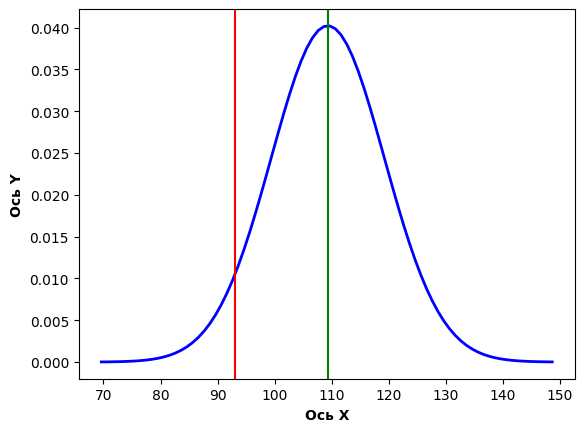

In [87]:
n = 1000
p = 0.1
binom_cdf = 0.05

for k in range(0, n + 1):
    if binom_cdf >= binom.cdf(k, n, p):
        n += 1 
    else:
        print(f'Количество промокодов {n} при котором вероятность не выполнить план < {binom.cdf(k, n, p).round(2)*100} %')
        break
    

mu = n * p # Математическое ожидание
sigma = (n * p * (1 - p))**0.5 # Стандартное отклонение  - корень из дисперсии


# Границы промежутка mu плюс-минус 4 sigma
arange = np.arange((mu - 4 * sigma),(mu + 4 * sigma),1)

# Используется синия линия ширины 2
plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'b-', lw=2)
plt.axvline(x=k, color='red')
plt.axvline(x=mu, color='green')
plt.xlabel('Ось Х', fontsize=10, fontweight="bold")
plt.ylabel('Oсь Y', fontsize=10, fontweight="bold")
plt.show()

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** 
- Количество необходимых промокодов 1093, для того, чтобы 100 существующих клиентов продлили подписку, при вероятности не выполнить план 5%.

</div>

## Задание №2

Вероятность, что уведомление откроют не более 399,5 тыс. пользователей: 15.37%


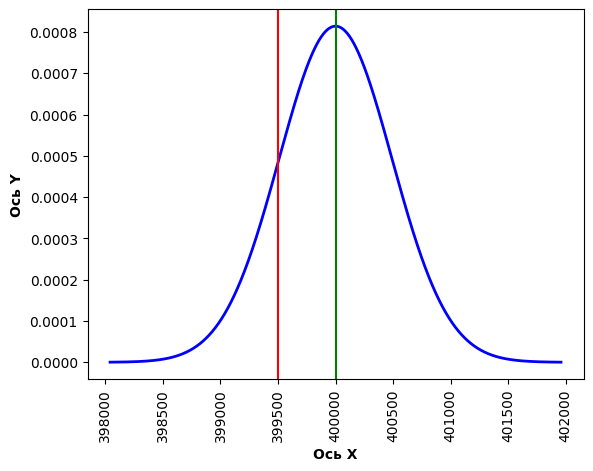

In [88]:
n = 1000000
p = 0.4

mu = n * p # Математическое ожидание

sigma = (n * p * (1 - p))**0.5 # Стандартное отклонение  - корень из дисперсии

# задано нормальное распределение 
distr = st.norm(mu, sigma)

# значение, для которого хотим найти вероятность
x = 399500

# считаем вероятность получить значение, равное x или меньше 
result = distr.cdf(x)
print('Вероятность, что уведомление откроют не более 399,5 тыс. пользователей:', '{:.2%}'.format(result))


# Границы промежутка mu плюс-минус 4 sigma
arange = np.arange((mu - 4 * sigma),(mu + 4 * sigma),1)

# Используется синия линия ширины 2
plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'b-', lw=2)
plt.axvline(x, color='red')
plt.axvline(x=mu, color='green')
plt.xticks(rotation=90)
plt.xlabel('Ось Х', fontsize=10, fontweight="bold")
plt.ylabel('Oсь Y', fontsize=10, fontweight="bold")
plt.show()

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** 
- Вероятность того, что не более 399,5 тысяч пользователей откроют уведомление, составляет 15,37%. Это означает, что большая часть пользователей откроет уведомление, что может повысить эффективность коммуникации с бизнесом.

</div>

## Общий вывод  
<div style="color: #000000; border-radius: 10px; box-shadow: 2px 2px 4px; border: 1px solid; background:#DCDCDC; padding: 10px">
<h4><font color="#0000CD">Общий вывод:</font></h4>
​
1. Были открыты 3 датафрейма:
    - в первом **`users_go`** 1565 строк и 5 столбцов, пропусков не обнаружено, найдены дубликаты, в последствии устранены.
    - во втором **`rides_go`** 18068 строк и 4 столбца, пропусков и дубликатов не обнаружено.
    - в третьем **`subscriptions_go`** 2 строки и 4 столбца, пропусков и дубликатов не обнаружено.
    
​
2. В процессе предобработки данных столбец `date` в датафрейме **`rides_go`** был приведен к типу pandas datetime, столбец `distance` округлен до 2х знаков после запятой, так же был создан столбец с номером месяца `date_month`. В датафрейме **`users_go`** устранены дубликаты методом `drop_duplicates()`.
​
3. В процессе исследовательского анализа данных были построены графики и гистрограммы:
    - частота встречаемости городов: на основне данного графика можно сделать вывод, что в первую пятерку городов входит 4 южных города в которых на первом месте Пятигорск, исключение составляет Екатеринбург на втором месте, связано с это с наиболее длинным сезоном, в которых сезон проката длинее.
    - Сделана диаграмма соотношения пользователей с подпиской и без, по данной информации видно, что количество пользователей без подписки превышает количество пользователей с подпиской.
    - Построено соотношение пользователей по возрасту, в основном пользователи от 20 до 29 лет, самые активные 25 лет.
    - Визуализировано число поездок в зависимости от дальности поездки, самый большой пик составляет медиана 3133 метра, имеется еще один пик на 700 метров, имеются аномальные значения после 5900 метров.
    - Составлено соотношение и построен график по продолжительности поездки пользователей, самые частые составляют 18 минут, меньше всего занимают поездки 36 минут.
4. На четвертом шаге был создан единый датафрейм **`general_table`** о пользователях, поездках и подписках с помощью объединения таблиц методом `merge()`, проверено количество строк **18068**
​
    - созданы два датафрейма с подпиской и без: `general_table_free` и `general_table_ultra`.
    - визуализированна информация о расстоянии и времени поездок для пользователей обеих категорий: данная информация показывает, что наиболее большое расстояние проезжают пользователи с подпиской, но время поездки больше у пользователей без подписки.
5. На пятом шаге был создан датафрейм **`user_gener_table`** с агрегированными данными о поездках на основе датафрейма из шага 4, было найдено сумарное расстояние, количество поездок и сумарное время для каждого пользователя за каждый месяц. Так же был добавлен столбец `monthly_revenue` с помесячной выручкой, которую принес каждый пользователь.
​
6. На шестом шаге были проверены гипотезы:
​
   - было выяснено, что пользователи с подпиской тратят больше времени на поездки, были проверены 2 датафрейма `general_table_ultra` и `general_table_free` ,полученное значение `p-value:` оказалось меньше заданного уровня значимости. Бизнесу выгодно, когда пользователи с подпиской тратят больше времени на поездки, потому что это увеличивает их лояльность к бренду и частоту использования его услуг. Подписчики получают комплексные скидки, эксклюзивные форматы подписок и доступ к нескольким сервисам одновременно, что делает их более привязанными к компании и готовыми тратить больше денег на её услуги. 
   - среднее расстояние пользователей с подпиской равно 3130 метров, полученное значение `p-value:` больше заданного уровня значимости, поэтому не получилось отвергнуть нулевую гипотезу. Расстояние 3130 выгодно бизнесу с точки зрения износа самокатов, потому что на таком расстоянии стоимость аренды самоката покрывает его износ. Это позволяет бизнесу получать прибыль и компенсировать затраты на обслуживание и ремонт самокатов.
   - после проверки гипотезы помесячной выручки стало известно, что выручка от пользователей с подпиской выше, чем от пользователей без подписки, `p-value:` оказался ниже уровня значимости, скорее всего это связано с дополнительными функциями, которые предоставляет платная подписка.
   - был сформулирован вывод о количестве обращений в поддержку, гипотеза была бы проверена с помощью метода `scipy.stats.ttest_rel()`, в качестве аргумента следовало бы указать `alternative='less'`, выборки должны быть одинаковыми по размеру.
 
7. На седьмом этапе было определено, что для обеспечения вероятности невыполнения плана менее 5% отдел маркетинга должен разослать 1093 промокода. Также было установлено, что при отправке уведомления 1 миллиону пользователей с вероятностью открытия 40% не более 399,5 тысяч пользователей откроют уведомление, что составляет 15,37%, Это означает, что большая часть пользователей не откроет уведомление, что может снизить эффективность коммуникации с бизнесом.
​
8. Сравнение показателей суммарной годовой выручки и среднемесячной выручки для каждого тарифа показывает, что пользователи с подпиской приносят больше дохода, чем пользователи без подписки. Условно, на пользователях с подпиской мы заработали 1644537₽ за год, а на пользователях без подписки — 2234104₽. В среднем, пользователь с подпиской приносит 362.79₽ в месяц, а пользователь без подписки — 328.64₽ рублей.
Таким образом, бизнесу рекомендуется сосредоточиться на привлечении и удержании пользователей с подпиской, так как они являются более ценными клиентами и приносят больше дохода, например: 
    - предложить дополнительные преимущества и скидки для пользователей с подпиской, чтобы стимулировать их оставаться активными.
    - активно продвигать сервис среди потенциальных клиентов, используя различные маркетинговые каналы и рекламные кампании.
    - проводить регулярные акции и скидки для новых пользователей, чтобы привлечь больше клиентов.

По каждому разделу написаны предварительные выводы и разъяснения.
</div>